PCA

In [1]:
#copied mainly from https://machinelearningmastery.com/principal-component-analysis-for-visualization/
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
winedata = load_wine()
X = winedata['data']
y = winedata['target']
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Target Output: \n", y) #y has 3 classes
print("Feature Names: \n", winedata["feature_names"])
print("Target Names: \n", winedata["target_names"])


X shape: (178, 13)
y shape: (178,)
Target Output: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Feature Names: 
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: 
 ['class_0' 'class_1' 'class_2']


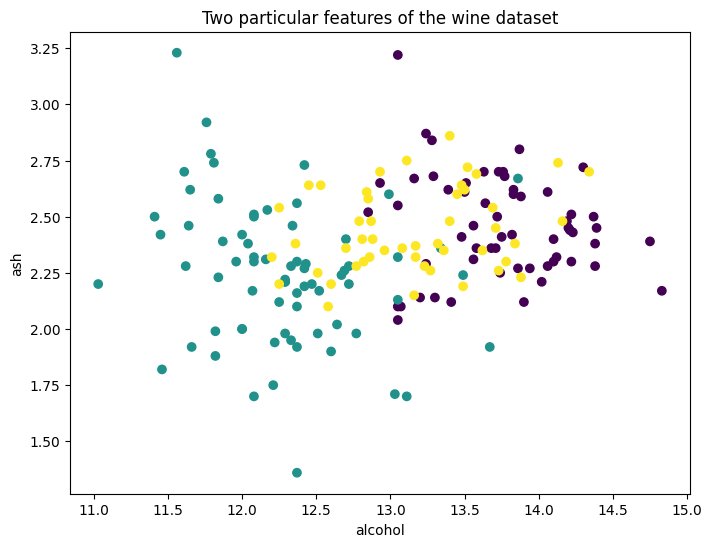

In [3]:
# 2D Scatter plot any two features f1 and f2 in the data
f1 = 0
f2 = 2
plt.figure(figsize=(8,6))
plt.scatter(X[:,f1], X[:,f2], c=y)
plt.xlabel(winedata["feature_names"][f1])
plt.ylabel(winedata["feature_names"][f2])
plt.title("Two particular features of the wine dataset")
plt.show()

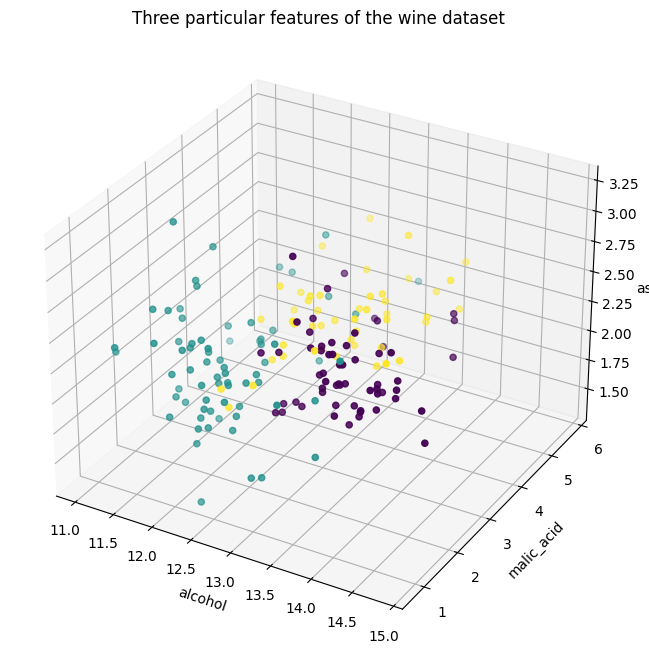

In [4]:
# 3D Scatter Plot any 3 features f1, f2, and f3 in the data
f1 = 0
f2 = 1
f3 = 2
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
#plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
ax.scatter(X[:,f1], X[:,f2], X[:,f3], c=y)
ax.set_xlabel(winedata["feature_names"][f1])
ax.set_ylabel(winedata["feature_names"][f2])
ax.set_zlabel(winedata["feature_names"][f3])
ax.set_title("Three particular features of the wine dataset")
plt.show()

Shape of Xt:  (178, 13)


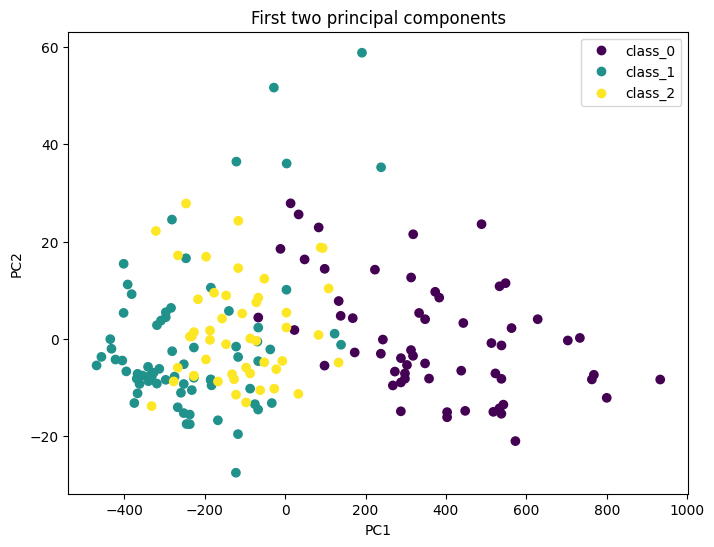

In [5]:
# Do a PCA on the input. Show first two principal components. No data normalization.
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X) #Full PCA is done on feature set X
print("Shape of Xt: ", Xt.shape)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y) #first 2 principal components are plotted
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()

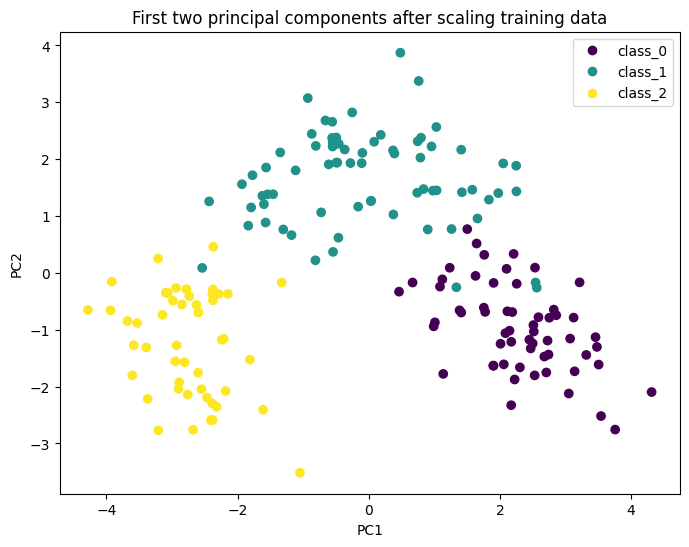

In [6]:
# First 2 principal components. Use standard scaler; mean = 0/sd = 1 on data.
# Example of using the pipeline object.
# see https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling training data")
plt.show()

In [7]:
# Print the explained variance, variance ratio, and cumulative sum for PCs
print("Wine data Explained variance , variance ratio, and variance ratio cumulative sum:")
print (pca.explained_variance_, "\n") #raw variance
print (pca.explained_variance_ratio_, "\n") #core weighted variance or info. content % that sums to 1.
print (pca.explained_variance_ratio_.cumsum()) #cumulative variance - last value is 1.

Wine data Explained variance , variance ratio, and variance ratio cumulative sum:
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199] 

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215] 

[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


Digits Data
PCA reduced to 2 dimensions will not work well for digits data

In [8]:
#PCA on Digits data
from sklearn.datasets import load_digits
digitsdata = load_digits()
X, y = digitsdata['data'], digitsdata['target']
print("X shape:", X.shape) #1797 data points.  Image is 8x8 = 64 features.
print("y shape:", y.shape)


X shape: (1797, 64)
y shape: (1797,)


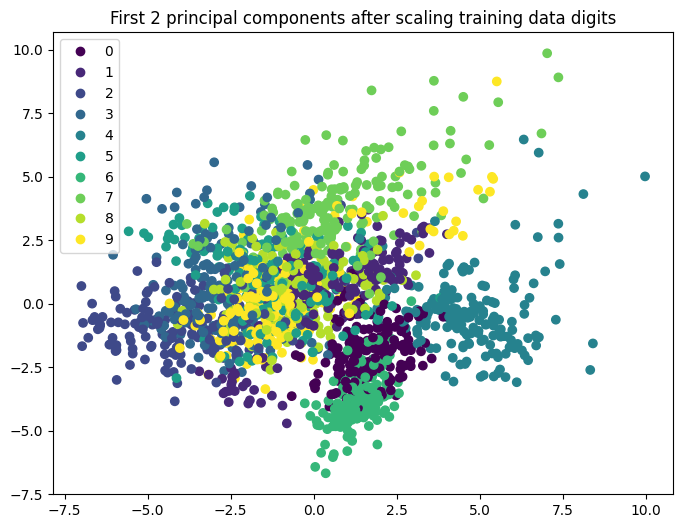

In [9]:
#Transform X of 64 dimensions into new Xt of 64 dimensions. Plot first 2 PCA.
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X) #Xt is transformed X.
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y) #show only 2 principle components

#for more on legend method: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(handles=plot.legend_elements()[0], labels=list(digitsdata['target_names']))
plt.title("First 2 principal components after scaling training data digits")
plt.show()

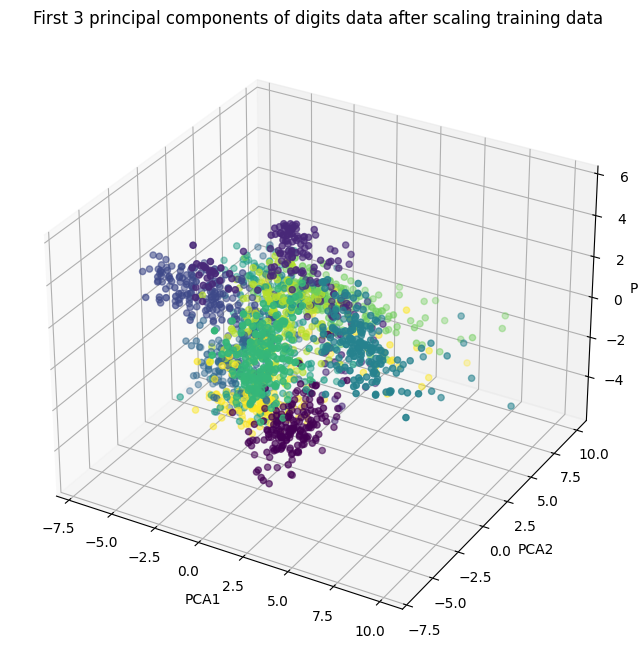

In [10]:
#Plot first 3 PCA.
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xt[:,0], Xt[:,1], Xt[:,2], c=y)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("First 3 principal components of digits data after scaling training data")
plt.show()

In [11]:
# Print the explained variance, variance ratio, and cumulative sum for PCs
print("Digits data explained variance , variance ratio, and variance ratio cumulative sum:")
print (pca.explained_variance_, "\n")
print (pca.explained_variance_ratio_, "\n")
print (pca.explained_variance_ratio_.cumsum())

Digits data explained variance , variance ratio, and variance ratio cumulative sum:
[7.34477606e+00 5.83549054e+00 5.15396118e+00 3.96623597e+00
 2.96634520e+00 2.57204442e+00 2.40600941e+00 2.06867355e+00
 1.82993314e+00 1.78951739e+00 1.69784616e+00 1.57287889e+00
 1.38870781e+00 1.35933609e+00 1.32152536e+00 1.16829176e+00
 1.08368678e+00 9.99778617e-01 9.74382931e-01 9.08912418e-01
 8.22719264e-01 7.76310139e-01 7.11556753e-01 6.45523648e-01
 5.95273988e-01 5.76501797e-01 5.26731552e-01 5.10636301e-01
 4.86863813e-01 4.55601071e-01 4.42851552e-01 4.22300863e-01
 3.99106303e-01 3.91101111e-01 3.60945168e-01 3.48603059e-01
 3.19596300e-01 2.94066271e-01 2.76922851e-01 2.58273004e-01
 2.47830286e-01 2.42356600e-01 2.17581996e-01 2.07995927e-01
 2.00090902e-01 1.89835165e-01 1.76128942e-01 1.68752359e-01
 1.58184741e-01 1.43114274e-01 1.33210813e-01 1.24263708e-01
 1.19328984e-01 1.11886547e-01 1.02504338e-01 9.84087608e-02
 9.01854301e-02 8.24681230e-02 7.63539426e-02 6.32896150e-02
 

In [12]:
print("Data Type: ", type(pca.explained_variance_)) #numpy data type
np.set_printoptions(precision=3, suppress=True) #print with 3 decimal places
print (pca.explained_variance_, "\n")
print (pca.explained_variance_ratio_, "\n")
print (pca.explained_variance_ratio_.cumsum())

Data Type:  <class 'numpy.ndarray'>
[7.345 5.835 5.154 3.966 2.966 2.572 2.406 2.069 1.83  1.79  1.698 1.573
 1.389 1.359 1.322 1.168 1.084 1.    0.974 0.909 0.823 0.776 0.712 0.646
 0.595 0.577 0.527 0.511 0.487 0.456 0.443 0.422 0.399 0.391 0.361 0.349
 0.32  0.294 0.277 0.258 0.248 0.242 0.218 0.208 0.2   0.19  0.176 0.169
 0.158 0.143 0.133 0.124 0.119 0.112 0.103 0.098 0.09  0.082 0.076 0.063
 0.05  0.    0.    0.   ] 

[0.12  0.096 0.084 0.065 0.049 0.042 0.039 0.034 0.03  0.029 0.028 0.026
 0.023 0.022 0.022 0.019 0.018 0.016 0.016 0.015 0.013 0.013 0.012 0.011
 0.01  0.009 0.009 0.008 0.008 0.007 0.007 0.007 0.007 0.006 0.006 0.006
 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003
 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.   ] 

[0.12  0.216 0.3   0.365 0.414 0.456 0.496 0.529 0.559 0.589 0.617 0.642
 0.665 0.687 0.709 0.728 0.746 0.762 0.778 0.793 0.807 0.819 0.831 0.842
 0.851 0.861 0.869 0.878 0.886 0

On Iris Dataset

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVC

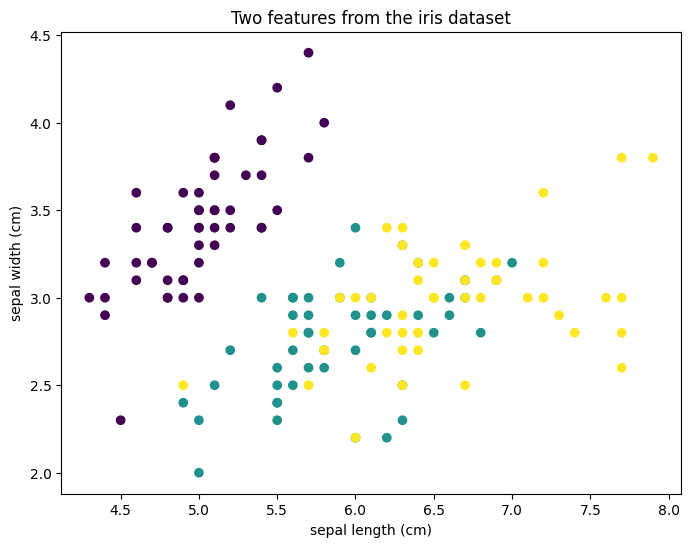

In [14]:
# Load iris dataset
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset")
plt.show()

In [15]:
# Show the principal components
pca = PCA().fit(X)
print("Principal components:")
print(pca.components_) #The Rotation matrix

Principal components:
[[ 0.361 -0.085  0.857  0.358]
 [ 0.657  0.73  -0.173 -0.075]
 [-0.582  0.598  0.076  0.546]
 [-0.315  0.32   0.48  -0.754]]


In [16]:
# Print the explained variance, variance ratio, and cumulative sum for PCs
print("Iris data explained variance , variance ratio, and variance ratio cumulative sum:")
print (pca.explained_variance_, "\n")
print (pca.explained_variance_ratio_, "\n")
print (pca.explained_variance_ratio_.cumsum())

Iris data explained variance , variance ratio, and variance ratio cumulative sum:
[4.228 0.243 0.078 0.024] 

[0.925 0.053 0.017 0.005] 

[0.925 0.978 0.995 1.   ]


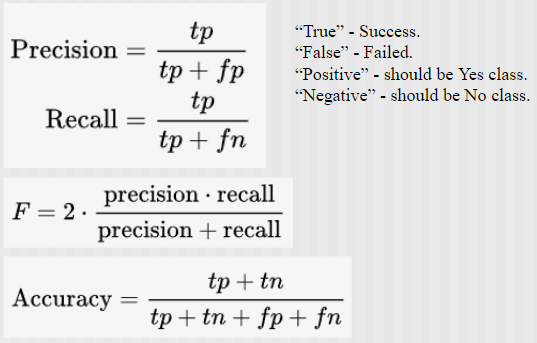

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Run Support vector classifier (SVC) on all features
# Support Vector Classifier - uses hyper planes to separate classes very similar to a MLP
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using all features, accuracy: ", clf.score(X_test, y_test))
print("Using all features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))

Using all features, accuracy:  0.94
Using all features, F1:  0.9374389051808407


In [26]:
print("X_train\n", X_train)
print("\nX_test\n", X_test)
print("\ny_train\n", y_train)
print("\ny_test\n", y_test)

X_train
 [[5.1 3.7 1.5 0.4]
 [7.7 3.8 6.7 2.2]
 [4.7 3.2 1.6 0.2]
 [5.7 2.6 3.5 1. ]
 [5.1 3.8 1.5 0.3]
 [7.6 3.  6.6 2.1]
 [6.6 3.  4.4 1.4]
 [5.  3.5 1.6 0.6]
 [5.3 3.7 1.5 0.2]
 [5.7 3.8 1.7 0.3]
 [6.6 2.9 4.6 1.3]
 [5.7 2.5 5.  2. ]
 [5.6 2.5 3.9 1.1]
 [6.2 2.2 4.5 1.5]
 [5.6 2.7 4.2 1.3]
 [5.8 2.6 4.  1.2]
 [5.  3.2 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [6.  2.7 5.1 1.6]
 [7.2 3.2 6.  1.8]
 [6.3 3.4 5.6 2.4]
 [5.8 2.7 3.9 1.2]
 [6.3 3.3 6.  2.5]
 [6.5 2.8 4.6 1.5]
 [6.1 3.  4.6 1.4]
 [5.8 2.7 5.1 1.9]
 [6.4 3.2 5.3 2.3]
 [6.9 3.1 5.4 2.1]
 [5.9 3.  4.2 1.5]
 [5.  3.  1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.3 0.3]
 [6.3 3.3 4.7 1.6]
 [5.8 2.7 4.1 1. ]
 [5.8 2.8 5.1 2.4]
 [5.5 2.4 3.8 1.1]
 [7.2 3.6 6.1 2.5]
 [7.7 3.  6.1 2.3]
 [4.4 2.9 1.4 0.2]
 [6.8 3.  5.5 2.1]
 [6.2 3.4 5.4 2.3]
 [6.7 3.  5.  1.7]
 [7.4 2.8 6.1 1.9]
 [4.9 2.5 4.5 1.7]
 [5.9 3.  5.1 1.8]
 [6.8 3.2 5.9 2.3]
 [6.1 2.8 4.7 1.2]
 [6.7 3.1 4.7 1.5]
 [5.  2.3 3.3 1. ]
 [5.6 2.8 4.9 2. ]
 [5.  3.4 1.5 0.2]
 [5.6 3.  4.1 1.3]
 [6

In [29]:
# Run classifier on PC1 (only 1 feature)
mean = X_train.mean(axis=0) #find the mean over matrix X_train along the column to get a vector
print("mean vector\n", mean)
X_train2 = X_train - mean #Each training is subtracted by mean
#X_train2 = X_train
print("\nX_train2 or X with mean subtracted:\n", X_train2)
pca = PCA().fit(X_train2)

mean vector
 [5.879 3.071 3.801 1.229]

X_train2 or X with mean subtracted:
 [[-0.779  0.629 -2.301 -0.829]
 [ 1.821  0.729  2.899  0.971]
 [-1.179  0.129 -2.201 -1.029]
 [-0.179 -0.471 -0.301 -0.229]
 [-0.779  0.729 -2.301 -0.929]
 [ 1.721 -0.071  2.799  0.871]
 [ 0.721 -0.071  0.599  0.171]
 [-0.879  0.429 -2.201 -0.629]
 [-0.579  0.629 -2.301 -1.029]
 [-0.179  0.729 -2.101 -0.929]
 [ 0.721 -0.171  0.799  0.071]
 [-0.179 -0.571  1.199  0.771]
 [-0.279 -0.571  0.099 -0.129]
 [ 0.321 -0.871  0.699  0.271]
 [-0.279 -0.371  0.399  0.071]
 [-0.079 -0.471  0.199 -0.029]
 [-0.879  0.129 -2.601 -1.029]
 [-0.179  1.329 -2.301 -0.829]
 [ 0.121 -0.371  1.299  0.371]
 [ 1.321  0.129  2.199  0.571]
 [ 0.421  0.329  1.799  1.171]
 [-0.079 -0.371  0.099 -0.029]
 [ 0.421  0.229  2.199  1.271]
 [ 0.621 -0.271  0.799  0.271]
 [ 0.221 -0.071  0.799  0.171]
 [-0.079 -0.371  1.299  0.671]
 [ 0.521  0.129  1.499  1.071]
 [ 1.021  0.029  1.599  0.871]
 [ 0.021 -0.071  0.399  0.271]
 [-0.879 -0.071 -2.201 -

In [30]:
print("Rotation Matrix to transform X_train2: \n", pca.components_) #4x4
print("\nRotation[0]: \n", pca.components_[0])#4x1

Rotation Matrix to transform X_train2: 
 [[ 0.356 -0.091  0.857  0.36 ]
 [-0.666 -0.723  0.17   0.07 ]
 [-0.586  0.611  0.088  0.525]
 [ 0.295 -0.308 -0.478  0.768]]

Rotation[0]: 
 [ 0.356 -0.091  0.857  0.36 ]


In [31]:
#Extract only the 1 main dimension as a new feature
X_train_PCA1 = (X_train2 @ pca.components_[0]) #X_train2 is Mx4 x R[0] is 4x1. Result is Mx1
print("\nX_train after PC1 is a vector:\n", X_train_PCA1) #Result is a vector of size M, the no. of data points.



X_train after PC1 is a vector:
 [-2.606  3.417 -2.689 -0.361 -2.652  3.333  0.838 -2.466 -2.607 -2.267
  0.983  1.294 -0.009  0.891  0.302  0.175 -2.926 -2.457  1.325  2.549
  2.084  0.08   2.472  1.028  0.832  1.361  1.845  2.045  0.454 -2.564
 -3.053 -2.831  1.033  0.18   1.532 -0.121  2.851  3.012 -2.94   2.105
  1.841  1.496  2.779  0.473  1.334  2.502  0.864  1.158 -0.754  1.146
 -2.687  0.189  1.86   0.583  0.756 -2.625  1.845 -2.71  -2.346  1.401
  0.865  3.436  2.254 -2.843  0.3   -2.791 -2.801 -2.947 -2.273  1.361
 -2.746 -2.879  0.654 -0.555 -0.799  0.927  1.242 -2.373 -2.472  2.555
 -2.714  0.604  1.914 -2.689  0.586  1.201  1.332 -2.899 -2.651  2.264
  0.76   1.746  2.213 -3.276 -2.672  0.32   1.601  1.271 -2.716  1.112]


In [33]:
#make into a matrix
X_train_PCA1_matrix = X_train_PCA1.reshape(-1,1) #reshaped from vector of 1 row into a matrix of many rows (1 col)
print("\nX_train_PCA1_matrix:\n", X_train_PCA1_matrix)


X_train_PCA1_matrix:
 [[-2.606]
 [ 3.417]
 [-2.689]
 [-0.361]
 [-2.652]
 [ 3.333]
 [ 0.838]
 [-2.466]
 [-2.607]
 [-2.267]
 [ 0.983]
 [ 1.294]
 [-0.009]
 [ 0.891]
 [ 0.302]
 [ 0.175]
 [-2.926]
 [-2.457]
 [ 1.325]
 [ 2.549]
 [ 2.084]
 [ 0.08 ]
 [ 2.472]
 [ 1.028]
 [ 0.832]
 [ 1.361]
 [ 1.845]
 [ 2.045]
 [ 0.454]
 [-2.564]
 [-3.053]
 [-2.831]
 [ 1.033]
 [ 0.18 ]
 [ 1.532]
 [-0.121]
 [ 2.851]
 [ 3.012]
 [-2.94 ]
 [ 2.105]
 [ 1.841]
 [ 1.496]
 [ 2.779]
 [ 0.473]
 [ 1.334]
 [ 2.502]
 [ 0.864]
 [ 1.158]
 [-0.754]
 [ 1.146]
 [-2.687]
 [ 0.189]
 [ 1.86 ]
 [ 0.583]
 [ 0.756]
 [-2.625]
 [ 1.845]
 [-2.71 ]
 [-2.346]
 [ 1.401]
 [ 0.865]
 [ 3.436]
 [ 2.254]
 [-2.843]
 [ 0.3  ]
 [-2.791]
 [-2.801]
 [-2.947]
 [-2.273]
 [ 1.361]
 [-2.746]
 [-2.879]
 [ 0.654]
 [-0.555]
 [-0.799]
 [ 0.927]
 [ 1.242]
 [-2.373]
 [-2.472]
 [ 2.555]
 [-2.714]
 [ 0.604]
 [ 1.914]
 [-2.689]
 [ 0.586]
 [ 1.201]
 [ 1.332]
 [-2.899]
 [-2.651]
 [ 2.264]
 [ 0.76 ]
 [ 1.746]
 [ 2.213]
 [-3.276]
 [-2.672]
 [ 0.32 ]
 [ 1.601]
 [ 1.27

In [34]:
print("Shapes x_train_PCA_matrix vs. vector: ", X_train_PCA1_matrix.shape, X_train_PCA1.shape)

Shapes x_train_PCA_matrix vs. vector:  (100, 1) (100,)


In [35]:
#Earlier we did: clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
#Here we run using only the 1st PC as feature to do the training
clf = SVC(kernel="linear", gamma='auto').fit(X_train_PCA1_matrix, y_train)

In [36]:
#Now the testing
X_test2 = X_test - mean
print("Shape X_test:\n", X_test.shape)
#Xtest2 = X_test
print("\nShape X_test2:\n", X_test2.shape)
X_test_PCA1 = (X_test2 @ pca.components_[0])
print("\nShape X_test after PC1 is a vector:\n", X_test_PCA1.shape)
X_test_PCA1_matrix = X_test_PCA1.reshape(-1,1)
print("\nShape X_test_PCA1_matrix:\n", X_test_PCA1_matrix.shape)
print("Using PC1, accuracy: ", clf.score(X_test_PCA1_matrix, y_test))
print("Using PC1, F1: ", f1_score(y_test, clf.predict(X_test_PCA1_matrix), average="macro"))

Shape X_test:
 (50, 4)

Shape X_test2:
 (50, 4)

Shape X_test after PC1 is a vector:
 (50,)

Shape X_test_PCA1_matrix:
 (50, 1)
Using PC1, accuracy:  0.96
Using PC1, F1:  0.9583333333333334


In [43]:
#Combine and not use matrix multiplication but use library functions
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#Use training data to come up with a fitting
pca = PCA().fit(X_train)

#Use PCA fit to transform training and testing X
Xt_train = pca.fit_transform(X_train) #X test is transformed by matrix but only 1 dim kept
Xt_test = pca.fit_transform(X_test) #X test is transformed by matrix but only 1 dim kept
print("Shape of Xt_train and Xt_test: ", Xt_train.shape, Xt_test.shape)

#Extract only 1 dimension of the PCA as the training and testing data
Xt_train_1D = Xt_train[:,0:1]
Xt_test_1D = Xt_test[:,0:1]
print("Shape of Xt_train_1d and Xt_test_1D: ", Xt_train_1D.shape, Xt_test_1D.shape)

#Earlier we did: clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
#Here we run using only the 1st PC as feature to do the training
clf = SVC(kernel="linear", gamma='auto').fit(Xt_train_1D, y_train)

print("\nShape Xt_test_1D:\n", Xt_test_1D.shape)
print("Using PC1, accuracy: ", clf.score(Xt_test_1D, y_test))
print("Using PC1, F1: ", f1_score(y_test, clf.predict(Xt_test_1D), average="macro"))

Shape of Xt_train and Xt_test:  (100, 4) (50, 4)
Shape of Xt_train_1d and Xt_test_1D:  (100, 1) (50, 1)

Shape Xt_test_1D:
 (50, 1)
Using PC1, accuracy:  0.82
Using PC1, F1:  0.8245779793398841


In [44]:
#Let's do library PCA on all our iris data X and choose only 1 PC dimension
# to use as our feature for training and testing
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']

pca = PCA().fit(X)
Xt = pca.fit_transform(X) #Xt is transformed X.

print("Shape of X: ", X.shape, "\nShape of Xt: ", Xt.shape)# X and X5 are Nx4.  We must make it 1 x 4

print ("Explained Variance is X: \n",pca.explained_variance_ratio_.cumsum())

Xt_1 = Xt[:,0:1]
print("Shape of Xt_1: ", Xt_1.shape)

Shape of X:  (150, 4) 
Shape of Xt:  (150, 4)
Explained Variance is X: 
 [0.925 0.978 0.995 1.   ]
Shape of Xt_1:  (150, 1)


In [45]:
# Split data using 1 dimension of the data only.
X_train, X_test, y_train, y_test = train_test_split(Xt_1, y, test_size=0.33)
print("X_train: \n", X_train)
print("\nX_test: \n", X_test)
print("\ny_train: \n", y_train)
print("\ny_test: \n", y_test)
# Run Support vector classifier (SVC) on all features
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using 1 feature, accuracy: ", clf.score(X_test, y_test))
print("Using 1 features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))

X_train: 
 [[-2.507]
 [-2.703]
 [-0.906]
 [ 3.231]
 [ 2.314]
 [ 1.558]
 [-2.507]
 [ 1.38 ]
 [-2.469]
 [-2.649]
 [ 0.299]
 [ 1.285]
 [ 1.972]
 [-2.386]
 [ 0.9  ]
 [ 0.332]
 [-2.981]
 [-2.997]
 [ 0.928]
 [ 2.35 ]
 [-2.599]
 [ 1.944]
 [-0.749]
 [ 0.642]
 [ 3.796]
 [ 1.044]
 [-2.543]
 [-2.588]
 [-2.626]
 [-2.625]
 [ 0.643]
 [ 1.444]
 [-2.801]
 [ 1.291]
 [ 1.95 ]
 [ 2.917]
 [ 2.614]
 [ 0.465]
 [ 2.388]
 [ 1.901]
 [ 1.088]
 [-0.068]
 [-0.009]
 [ 0.945]
 [ 2.617]
 [ 1.39 ]
 [ 2.124]
 [ 0.231]
 [-2.673]
 [ 1.221]
 [-2.77 ]
 [ 1.527]
 [-2.729]
 [-2.303]
 [ 0.512]
 [-0.705]
 [ 2.419]
 [-2.406]
 [ 0.183]
 [ 0.807]
 [ 0.715]
 [ 0.985]
 [ 1.116]
 [-2.889]
 [ 2.321]
 [ 0.932]
 [ 0.136]
 [ 1.415]
 [ 1.389]
 [-2.2  ]
 [-0.508]
 [ 2.933]
 [ 1.803]
 [ 0.922]
 [ 0.265]
 [ 2.563]
 [ 0.813]
 [-2.64 ]
 [ 0.045]
 [-2.281]
 [-2.648]
 [ 3.5  ]
 [-3.224]
 [ 1.298]
 [ 2.108]
 [ 0.66 ]
 [ 1.169]
 [-2.587]
 [ 3.487]
 [ 2.166]
 [ 2.531]
 [-3.216]
 [ 1.464]
 [-2.31 ]
 [ 3.397]
 [ 2.275]
 [ 2.842]
 [ 1.905]
 [ 1.781]